In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV

C:\Users\ochang\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ochang\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Load Data
df = pd.read_csv('BDataF.csv')
df_test = pd.read_csv('BDataTest.csv')


# Renaming Dummy Columns
df = pd.concat([df, pd.get_dummies(df['DateRose'], prefix='DateRose')], axis=1)
df = pd.concat([df, pd.get_dummies(df['ContestantRace'], prefix='Race')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['DateRose'], prefix='DateRose')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['ContestantRace'], prefix='Race')], axis=1)


BachelorData = df
BachelorTestData = df_test

In [3]:
#feature_cols = ['FirstImpressionRose', 'DateRose', 'OlderthanBachelor', 'YoungerthanBachelor', 'SameAgeasBachelor', 'DateRose_0', 'DateRose_1', 'DateRose_2']

feature_cols = [
                 'FirstImpressionRose',
                 'DateRose',
                 'AbsDistFromBachelorAge',
                 'RelDistFromBachelorAge',
                 'OlderthanBachelor',
                 'YoungerthanBachelor',
                 'SameAgeasBachelor',
                 'SameHairasBachelorette',
                 'DistFromBacheloretteAge',
                 'AbsDistFromBacheloretteAge',
                 'OlderThanBachelorette',
                 'YoungerThanBachelorette',
                 'SameAgeasBachelorette',
                 'SameRaceasBachelorette',
                 'DateRose_0',
                 'DateRose_1',
                 'DateRose_2',
                 'Race_Asian',
                 'Race_Black',
                 'Race_White'
                ]

X = BachelorData[feature_cols]
y = BachelorData['Winner']

In [4]:
#from sklearn.cross_validation import cross_val_score
#from sklearn.neighbors import KNeighborsClassifier

k_range = list(range(1, 5))
k_scores = []

for num in k_range:
    kn = KNeighborsClassifier(n_neighbors=num)
    scores = cross_val_score(kn, X, y, scoring='accuracy')
    k_scores.append(scores.mean())
    
print(k_scores)

[0.95525194613928044, 0.96566861280594718, 0.96566861280594718, 0.96566861280594718]


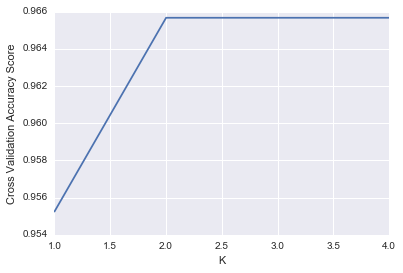

In [5]:
plt.plot(k_range, k_scores)
plt.xlabel('K')
plt.ylabel('Cross Validation Accuracy Score')

In [6]:
#from sklearn.grid_search import GridSearchCV

k_range = list(range(1, 5))
leaf_size_range = list(range(10, 50))

param_grid = dict(n_neighbors=k_range, leaf_size=leaf_size_range)
GSC = GridSearchCV(kn, param_grid, scoring='accuracy')
GSC.fit(X, y)
GSC_mean_scores = [result.mean_validation_score for result in GSC.grid_scores_]

print(GSC.best_score_)
print(GSC.best_params_)
print(GSC.best_estimator_)

0.965635738832
{'n_neighbors': 2, 'leaf_size': 10}
KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')


In [7]:
kn = KNeighborsClassifier(n_neighbors = 2, leaf_size=10)
scores = cross_val_score(kn, X, y, cv=10, scoring='roc_auc')
print(scores.mean())

0.478571428571
